<a href="https://colab.research.google.com/github/Santanukolkata/Data_Science/blob/master/Ad_hoc_projects/Retail_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import datetime as dt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
%%time
df_ret=pd.read_excel('/content/drive/My Drive/Colab Notebooks/Retail/train_retail.xlsx')
df_ret =df_ret.append(pd.read_excel('/content/drive/My Drive/Colab Notebooks/Retail/test_retail.xlsx')) 

CPU times: user 35.5 s, sys: 188 ms, total: 35.7 s
Wall time: 37.5 s


# Perform a preliminary data inspection and data cleaning.

In [5]:
df_ret.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
df_ret.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541909 entries, 0 to 162572
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 37.2+ MB


In [7]:
df_ret.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,558904,22292,HANGING CHICK YELLOW DECORATION,1,2011-07-04 16:18:00,1.25,NaN,United Kingdom
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom


In [8]:
df_ret.shape

(541909, 8)

**Check for missing data and formulate an apt strategy to treat them.**

In [9]:
#Checking for missing Data
df_ret.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
df_ret =df_ret[df_ret['CustomerID'].isna()==False]
df_ret.shape

(406829, 8)

In [11]:
df_ret.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

 **Remove duplicate data records.**

In [0]:
df_ret =df_ret.drop_duplicates()

In [13]:
df_ret.shape

(401604, 8)

## Perform descriptive analytics on the given data.
**Top 10 Items by Frequency**

In [14]:
neg_order=df_ret[df_ret['Quantity'] < 0].groupby('Description').count()['Quantity']
top_10_refund_count=neg_order.sort_values(ascending=False).head(10)
top_10_refund_count

Description
REGENCY CAKESTAND 3 TIER             180
Manual                               175
POSTAGE                               97
JAM MAKING SET WITH JARS              86
Discount                              77
SET OF 3 CAKE TINS PANTRY DESIGN      72
STRAWBERRY CERAMIC TRINKET BOX        54
ROSES REGENCY TEACUP AND SAUCER       53
RECIPE BOX PANTRY YELLOW DESIGN       47
JUMBO BAG RED RETROSPOT               44
Name: Quantity, dtype: int64

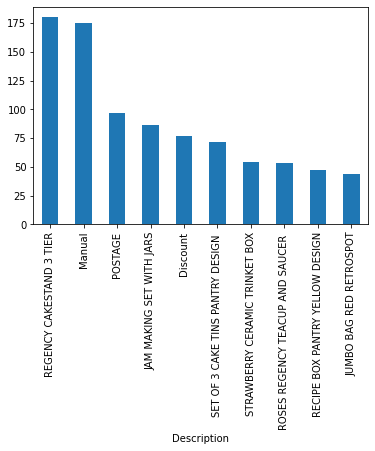

In [15]:
top_10_refund_count.plot(kind='bar')

**Top 10 Items by Total amount**

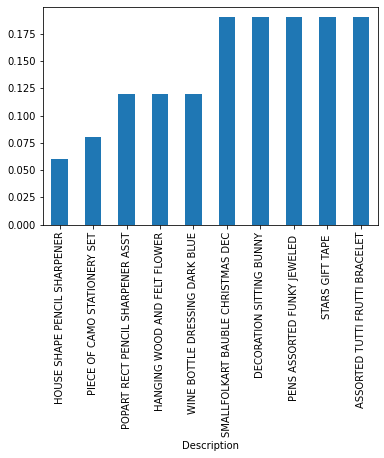

In [16]:
neg_order=df_ret[df_ret['Quantity'] < 0].groupby('Description').sum()['UnitPrice']
top_10_refund_total_amount=neg_order.sort_values(ascending=True).head(10)
top_10_refund_total_amount.plot(kind='bar')

**Outliers**

In [17]:
df_ret[['Quantity','UnitPrice']].describe()

,Quantity,UnitPrice
count,401604.000000,401604.000000
mean,12.183273,3.474064
std,250.283037,69.764035
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


In [18]:
df_ret[~((abs(df_ret['Quantity']) > 1000) | (df_ret['UnitPrice']  >1000))].describe()

,Quantity,UnitPrice,CustomerID
count,401442.000000,401442.000000,401442.000000
mean,11.792433,3.102725,15281.203606
std,32.404081,9.160709,1713.955060
min,-960.000000,0.000000,12347.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16788.000000
max,1000.000000,987.140000,18287.000000


In [19]:
df_ret=df_ret[~((abs(df_ret['Quantity']) > 1000) | (df_ret['UnitPrice']  >1000))]
df_ret.shape

(401442, 8)

# Perform cohort analysis (a cohort is a group of subjects that share a defining characteristic). Observe how a cohort behaves across time and compare it to other cohorts.

In [20]:
df_ret['OrderPeriod'] = df_ret.InvoiceDate.apply(lambda x: x.strftime('%Y-%m'))
df_ret.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderPeriod
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom,2011-06
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom,2011-05
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom,2011-01
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom,2010-12
5,552306,84789,ENCHANTED BIRD PLANT CAGE,4,2011-05-08 15:20:00,3.75,13911.0,United Kingdom,2011-05


In [21]:
df_ret.set_index('CustomerID', inplace=True)
df_ret['CohortGroup'] = df_ret.groupby(level=0)['InvoiceDate'].min().apply(lambda x: x.strftime('%Y-%m'))
df_ret.reset_index(inplace=True)
df_ret.tail(20)

,CustomerID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,OrderPeriod,CohortGroup
401422,14646.0,541711,22452,MEASURING TAPE BABUSHKA PINK,12,2011-01-21 11:18:00,2.95,Netherlands,2011-01,2010-12
401423,14499.0,575972,21313,GLASS HEART T-LIGHT HOLDER,3,2011-11-13 13:01:00,0.85,United Kingdom,2011-11,2011-03
401424,16450.0,559888,20719,WOODLAND CHARLOTTE BAG,10,2011-07-13 11:47:00,0.85,United Kingdom,2011-07,2011-07
401425,14178.0,575848,23377,PACK OF 12 DOLLY GIRL TISSUES,6,2011-11-11 12:10:00,0.39,United Kingdom,2011-11,2011-06
401426,17706.0,558540,21658,GLASS BEURRE DISH,6,2011-06-30 12:15:00,3.95,United Kingdom,2011-06,2010-12
401427,12893.0,575303,22469,HEART OF WICKER SMALL,4,2011-11-09 12:34:00,1.65,United Kingdom,2011-11,2011-11
401428,17841.0,571098,23300,GARDENERS KNEELING PAD CUP OF TEA,1,2011-10-13 15:38:00,1.65,United Kingdom,2011-10,2010-12
401429,15829.0,565204,35471D,SET OF 3 BIRD LIGHT PINK FEATHER,24,2011-09-01 16:45:00,0.39,United Kingdom,2011-09,2011-07
401430,14911.0,570388,23171,REGENCY TEA PLATE GREEN,12,2011-10-10 12:37:00,1.65,EIRE,2011-10,2010-12
401431,14543.0,546749,22487,WHITE WOOD GARDEN PLANT LADDER,32,2011-03-16 12:43:00,8.50,United Kingdom,2011-03,2010-12


In [0]:
grouped = df_ret.groupby(['CohortGroup', 'OrderPeriod'])

In [0]:
cohorts = grouped.agg({'CustomerID': pd.Series.nunique,
                       'StockCode': pd.Series.nunique,
                       'Quantity': np.sum})

In [24]:
cohorts.rename(columns={'CustomerID': 'TotalUserscnt',
                        'StockCode': 'TotalOrderscnt'}, inplace=True)
cohorts.head(100)

TotalUserscnt  TotalOrderscnt  Quantity
CohortGroup OrderPeriod                                         
2010-12     2010-12              944.0            2421    286671
            2011-01              361.0            1834    153160
            2011-02              316.0            1717    130352
            2011-03              365.0            1866    176117
            2011-04              340.0            1788    130045
...                                ...             ...       ...
2011-10     2011-11               93.0            1319     25113
            2011-12               46.0             602      7199
2011-11     2011-11              320.0            2133     84226
            2011-12               42.0             730      9168
2011-12     2011-12               40.0             680     12992

[91 rows x 3 columns]

In [25]:
def cohort_period(df):
    df['CohortPeriod'] = np.arange(len(df)) + 1
    return df

cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head(20)

TotalUserscnt  TotalOrderscnt  Quantity  CohortPeriod
CohortGroup OrderPeriod                                                       
2010-12     2010-12              944.0            2421    286671             1
            2011-01              361.0            1834    153160             2
            2011-02              316.0            1717    130352             3
            2011-03              365.0            1866    176117             4
            2011-04              340.0            1788    130045             5
            2011-05              375.0            1850    178206             6
            2011-06              359.0            1879    174889             7
            2011-07              334.0            1954    173598             8
            2011-08              335.0            1949    191284             9
            2011-09              373.0            2153    236651            10
            2011-10              354.0            2116    240391            11
            2011-11              473.0            2278    288855            12
            2011-12              260.0            1766    105056            13
2011-01     2011-01              420.0            1814    102163             1
            2011-02              102.0             994     30782             2
            2011-03              120.0            1109     35924             3
            2011-04              102.0             969     24693             4
            2011-05              139.0            1131     47695             5
            2011-06              127.0            1175     50699             6
            2011-07              111.0            1091     40920             7

In [0]:
cohorts.reset_index(inplace=True)
cohorts.set_index(['CohortGroup', 'CohortPeriod'], inplace=True)

In [27]:
cohort_group_size = cohorts['TotalUserscnt'].groupby(level=0).first()
cohort_group_size.head()

CohortGroup
2010-12    944.0
2011-01    420.0
2011-02    379.0
2011-03    441.0
2011-04    299.0
Name: TotalUserscnt, dtype: float64

In [28]:
cohorts['TotalUserscnt'].head()

CohortGroup  CohortPeriod
2010-12      1               944.0
             2               361.0
             3               316.0
             4               365.0
             5               340.0
Name: TotalUserscnt, dtype: float64

In [29]:
cohorts['TotalUserscnt'].unstack(0).head()

CohortGroup,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
CohortPeriod,,,,,,,,,,,,,
1,944.0,420.0,379.0,441.0,299.0,277.0,236.0,189.0,167.0,297.0,352.0,320.0,40.0
2,361.0,102.0,94.0,84.0,68.0,66.0,49.0,40.0,42.0,89.0,93.0,42.0,NaN
3,316.0,120.0,73.0,111.0,66.0,48.0,44.0,39.0,42.0,97.0,46.0,NaN,NaN
4,365.0,102.0,106.0,96.0,63.0,48.0,65.0,44.0,42.0,36.0,NaN,NaN,NaN
5,340.0,139.0,101.0,102.0,62.0,60.0,58.0,52.0,23.0,NaN,NaN,NaN,NaN


In [30]:
user_retention = cohorts['TotalUserscnt'].unstack(0).divide(cohort_group_size, axis=1)
user_retention.head(10)

CohortGroup,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
CohortPeriod,,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.0
2,0.382415,0.242857,0.248021,0.190476,0.227425,0.238267,0.207627,0.211640,0.251497,0.299663,0.264205,0.13125,NaN
3,0.334746,0.285714,0.192612,0.251701,0.220736,0.173285,0.186441,0.206349,0.251497,0.326599,0.130682,NaN,NaN
4,0.386653,0.242857,0.279683,0.217687,0.210702,0.173285,0.275424,0.232804,0.251497,0.121212,NaN,NaN,NaN
5,0.360169,0.330952,0.266491,0.231293,0.207358,0.216606,0.245763,0.275132,0.137725,NaN,NaN,NaN,NaN
6,0.397246,0.302381,0.245383,0.174603,0.237458,0.245487,0.330508,0.116402,NaN,NaN,NaN,NaN,NaN
7,0.380297,0.264286,0.255937,0.260771,0.230769,0.267148,0.101695,NaN,NaN,NaN,NaN,NaN,NaN
8,0.353814,0.259524,0.279683,0.238095,0.260870,0.101083,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.354873,0.314286,0.258575,0.285714,0.083612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
user_retention.columns

Index(['2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05',
       '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11',
       '2011-12'],
      dtype='object', name='CohortGroup')

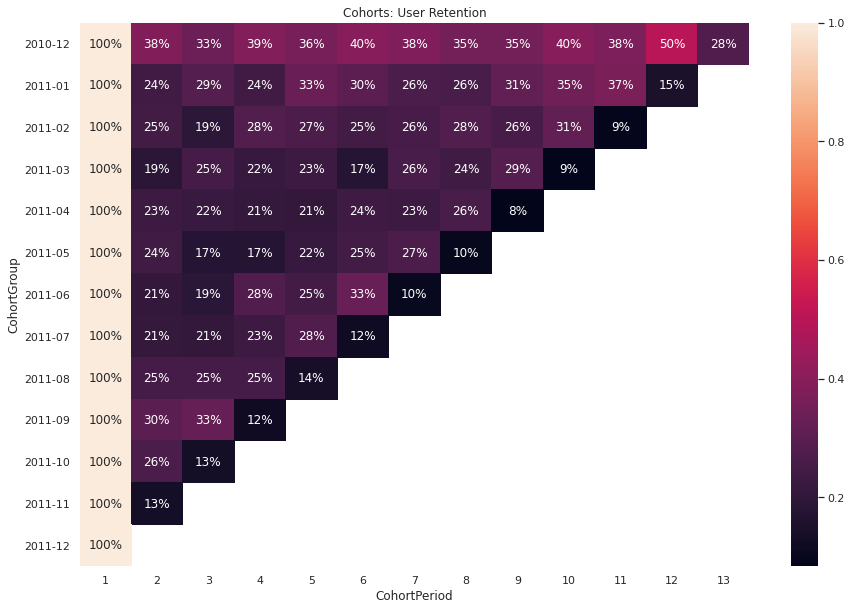

In [32]:
import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(15, 10))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%');

Build a RFM (Recency Frequency Monetary) model. Recency means the number of days since a customer made the last purchase. Frequency is the number of purchase in a given period. It could be 3 months, 6 months or 1 year. Monetary is the total amount of money a customer spent in that given period. Therefore, big spenders will be differentiated among other customers such as MVP (Minimum Viable Product) or VIP.

In [33]:
# print the time period
print('Min : {}, Max : {}'.format(min(df_ret.InvoiceDate), max(df_ret.InvoiceDate)))

Min : 2010-12-01 08:26:00, Max : 2011-12-09 12:50:00


In [34]:
# pin the last date
pin_date = max(df_ret.InvoiceDate) + dt.timedelta(1)
pin_date

Timestamp('2011-12-10 12:50:00')

In [35]:
df_ret['TotalSum'] = df_ret.Quantity * df_ret.UnitPrice
df_ret.head()

,CustomerID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,OrderPeriod,CohortGroup,TotalSum
0,16126.0,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,United Kingdom,2011-06,2011-02,30.00
1,18118.0,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,United Kingdom,2011-05,2010-12,5.10
2,15529.0,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,United Kingdom,2011-01,2010-12,0.85
3,14448.0,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,United Kingdom,2010-12,2010-12,19.50
4,13911.0,552306,84789,ENCHANTED BIRD PLANT CAGE,4,2011-05-08 15:20:00,3.75,United Kingdom,2011-05,2011-02,15.00


In [36]:
rfm = df_ret.groupby('CustomerID').agg({
    'InvoiceDate' : lambda x: (pin_date - x.max()).days,
    'InvoiceNo' : 'count', 
    'TotalSum' : 'sum'})
# rename the columns
rfm.rename(columns = {'InvoiceDate' : 'Recency', 
                      'InvoiceNo' : 'Frequency', 
                      'TotalSum' : 'Monetary'}, inplace = True)
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
12352.0,36,95,1545.41


In [0]:
# create labels and assign them to tree percentile groups 
r_labels = range(4, 0, -1)
r_groups = pd.qcut(rfm.Recency, q = 4, labels = r_labels)
f_labels = range(1, 5)
f_groups = pd.qcut(rfm.Frequency, q = 4, labels = f_labels)
m_labels = range(1, 5)
m_groups = pd.qcut(rfm.Monetary, q = 4, labels = m_labels)

In [38]:
rfm['R'] = r_groups.values
rfm['F'] = f_groups.values
rfm['M'] = m_groups.values
# sum up the three columns
rfm['RFM_Segment'] = rfm.apply(lambda x: str(x['R']) + str(x['F']) + str(x['M']), axis = 1)
rfm['RFM_Score'] = rfm[['R', 'F', 'M']].sum(axis = 1)
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12347.0,2,182,4310.00,4,4,4,444,12.0
12348.0,75,31,1797.24,2,2,4,224,8.0
12349.0,19,73,1757.55,3,3,4,334,10.0
12350.0,310,17,334.40,1,1,2,112,4.0
12352.0,36,95,1545.41,3,3,3,333,9.0


In [40]:
rfm_agg = rfm.groupby('RFM_Score').agg({
    'Recency' : 'mean',
    'Frequency' : 'mean',
    'Monetary' : ['mean', 'count']
})
rfm_agg.round(1).head(15)

Recency Frequency Monetary      
             mean      mean     mean count
RFM_Score                                 
3.0         264.8       7.9    123.7   391
4.0         175.5      13.9    226.3   395
5.0         152.2      21.1    343.3   514
6.0          93.1      28.3    526.6   467
7.0          78.4      39.3    713.1   438
8.0          62.5      56.0    965.7   467
9.0          44.8      78.6   1321.9   410
10.0         31.5     112.9   1900.7   436
11.0         20.5     190.3   3733.6   373
12.0          6.7     368.1   8745.2   470

In [41]:
# assign labels from total score
score_labels = ['Green', 'Bronze', 'Silver', 'Gold']
score_groups = pd.qcut(rfm.RFM_Score, q = 4, labels = score_labels)
rfm['RFM_Level'] = score_groups.values
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,RFM_Level
CustomerID,,,,,,,,,
12347.0,2,182,4310.00,4,4,4,444,12.0,Gold
12348.0,75,31,1797.24,2,2,4,224,8.0,Silver
12349.0,19,73,1757.55,3,3,4,334,10.0,Silver
12350.0,310,17,334.40,1,1,2,112,4.0,Green
12352.0,36,95,1545.41,3,3,3,333,9.0,Silver


# Kmeans Clustering

In [0]:
def neg_to_zero(x):
    if x <= 0:
        return 1
    else:
        return x

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [0]:
rfm['Recency'] = [neg_to_zero(x) for x in rfm.Recency]
rfm['Monetary'] = [neg_to_zero(x) for x in rfm.Monetary]
# unskew the data
rfm_log = rfm[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

In [44]:
rfm_log

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,0.693,5.204,8.369
12348.0,4.317,3.434,7.494
12349.0,2.944,4.290,7.472
12350.0,5.737,2.833,5.812
12352.0,3.584,4.554,7.343
...,...,...,...
18280.0,5.628,2.303,5.196
18281.0,5.198,1.946,4.392
18282.0,2.079,2.565,5.174


In [0]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log)
# transform into a dataframe
rfm_scaled = pd.DataFrame(rfm_scaled, index = rfm.index, columns = rfm_log.columns)

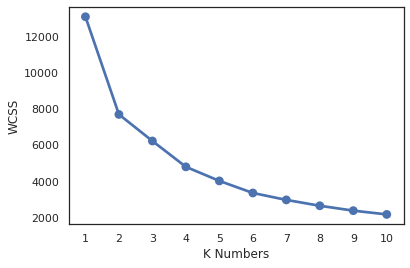

In [52]:
wcss = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters= k, init= 'k-means++', max_iter= 300)
    kmeans.fit(rfm_scaled)
    wcss[k] = kmeans.inertia_
# plot the WCSS values
sns.pointplot(x = list(wcss.keys()), y = list(wcss.values()))
plt.xlabel('K Numbers')
plt.ylabel('WCSS')
plt.show()

In [53]:
clus = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 300)
clus.fit(rfm_scaled)
# Assign the clusters to datamart
rfm['K_Cluster'] = clus.labels_
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,RFM_Level,K_Cluster
CustomerID,,,,,,,,,,
12347.0,2,182,4310.00,4,4,4,444,12.0,Gold,1
12348.0,75,31,1797.24,2,2,4,224,8.0,Silver,0
12349.0,19,73,1757.55,3,3,4,334,10.0,Silver,1
12350.0,310,17,334.40,1,1,2,112,4.0,Green,0
12352.0,36,95,1545.41,3,3,3,333,9.0,Silver,1


In [54]:
# assign cluster column 
rfm_scaled['K_Cluster'] = clus.labels_
rfm_scaled['RFM_Level'] = rfm.RFM_Level
rfm_scaled.reset_index(inplace = True)
# melt the dataframe
rfm_melted = pd.melt(frame= rfm_scaled, id_vars= ['CustomerID', 'RFM_Level', 'K_Cluster'], var_name = 'Metrics', value_name = 'Value')
rfm_melted.head()

,CustomerID,RFM_Level,K_Cluster,Metrics,Value
0,12347.0,Gold,1,Recency,-2.079243
1,12348.0,Silver,0,Recency,0.399570
2,12349.0,Silver,1,Recency,-0.539561
3,12350.0,Green,0,Recency,1.370849
4,12352.0,Silver,1,Recency,-0.101801


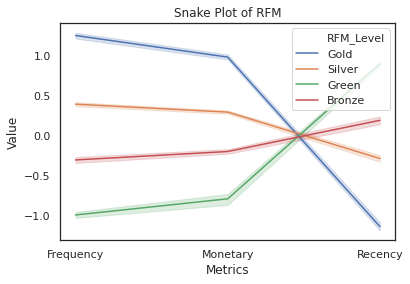

In [58]:
# a snake plot with RFM
sns.lineplot(x = 'Metrics', y = 'Value', hue = 'RFM_Level', data = rfm_melted)
plt.title('Snake Plot of RFM')
plt.legend(loc = 'upper right')


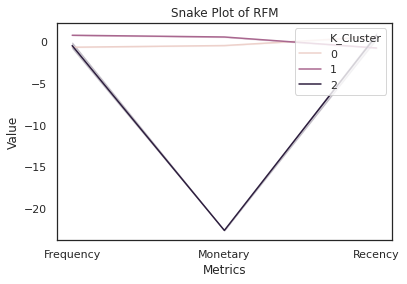

In [57]:
# a snake plot with K-Means
sns.lineplot(x = 'Metrics', y = 'Value', hue = 'K_Cluster', data = rfm_melted)
plt.title('Snake Plot of RFM')
plt.legend(loc = 'upper right')

In [0]:
import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D


In [0]:
rfm=rfm_scaled[['Recency',	'Frequency','Monetary']]
km = KMeans(n_clusters=3)
km.fit(rfm)
km.predict(rfm)
labels = km.labels_

Text(0.5, 0.92, 'K Means')

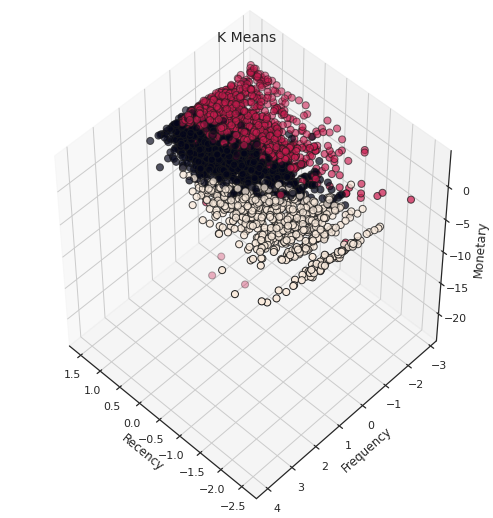

In [62]:
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(rfm['Recency'], rfm['Frequency'],rfm['Monetary'],
          c=labels.astype(np.float), edgecolor="k", s=50)
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary")
plt.title("K Means", fontsize=14)